In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_stata("/content/sece.dta", convert_categoricals=False)


In [8]:
data.shape

(633770, 32)

In [9]:
# Check columns in section E (employment and income)
print("\nColumns in Section E (Employment and Income):")
print(data.columns)


Columns in Section E (Employment and Income):
Index(['hhcode', 'psu', 'province', 'region', 'district', 'idc', 'seaq01',
       'seaq02', 'seaq03', 'seaq04', 'seaq05', 'seaq06', 'seaq07', 'seaq08',
       'seaq09', 'seaq10', 'seaq11', 'seaq12', 'seaq13', 'seaq14', 'seaq15',
       'seaq16', 'seaq17', 'seaq18', 'seaq19', 'seaq20', 'seaq21', 'seaq22',
       'seaq23', 'seaq24', 'seaq25', 'seaq26'],
      dtype='object')


In [10]:
income_columns = ['seaq07', 'seaq08', 'seaq09', 'seaq10',
                  'seaq11', 'seaq12', 'seaq13', 'seaq14', 'seaq15']

In [11]:
income_data = data[income_columns]

In [12]:
income_data.columns = ['report_period', 'monthly_income', 'months_worked', 'annual_income',
                       'sec_report_period', 'sec_monthly_income', 'sec_months_worked',
                       'sec_annual_income', 'other_sec_income']


In [13]:
income_data = income_data.fillna(0)

In [14]:
# Calculate annual income from the main occupation
income_data['main_annual_income'] = income_data.apply(
    lambda row: row['monthly_income'] * row['months_worked']
    if row['report_period'] == 1 else row['annual_income'], axis=1
)


In [15]:
# Calculate annual income from the secondary occupation
income_data['sec_annual_income_calc'] = income_data.apply(
    lambda row: row['sec_monthly_income'] * row['sec_months_worked']
    if row['sec_report_period'] == 1 else row['sec_annual_income'], axis=1
)


In [16]:
income_data['total_annual_income'] = income_data['main_annual_income'] + income_data['sec_annual_income_calc']

In [17]:
# Apply World Bank poverty threshold ($2.15/day * 365 days = $784.75/year)
poverty_threshold = 2.15 * 365
income_data['poverty_status'] = income_data['total_annual_income'].apply(
    lambda x: 'poor' if x < poverty_threshold else 'non-poor'
)

In [18]:
income_data.head()

,report_period,monthly_income,months_worked,annual_income,sec_report_period,sec_monthly_income,sec_months_worked,sec_annual_income,other_sec_income,main_annual_income,sec_annual_income_calc,total_annual_income,poverty_status
0,2.0,0.0,0.0,250000.0,1.0,6121.0,144.0,9.0,160000.0,250000.0,881424.0,1131424.0,non-poor
1,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,poor
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,poor
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,poor
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,poor


In [19]:
poverty_counts = income_data['poverty_status'].value_counts()

# Print counts
print("Poverty Status Counts:")
print(poverty_counts)

Poverty Status Counts:
poverty_status
poor        439389
non-poor    194381
Name: count, dtype: int64


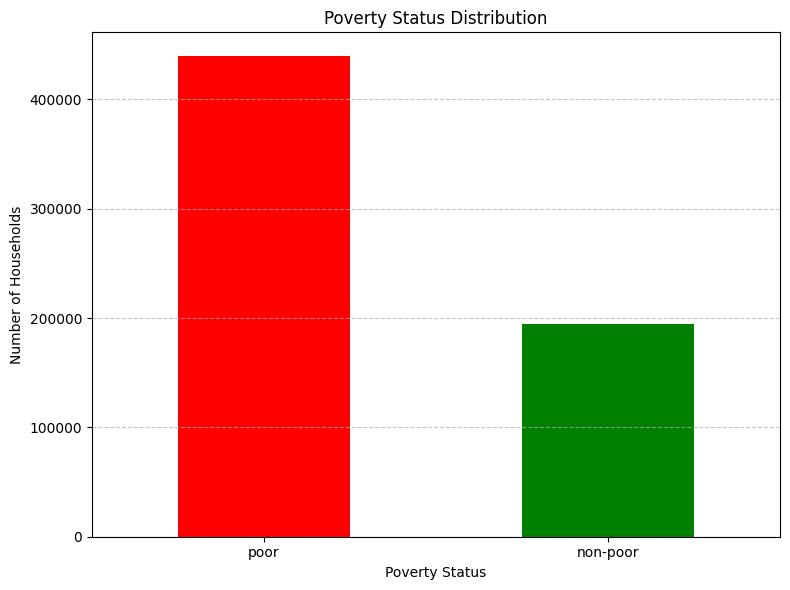

In [20]:
# Create a bar chart
plt.figure(figsize=(8, 6))
poverty_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Poverty Status Distribution')
plt.xlabel('Poverty Status')
plt.ylabel('Number of Households')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()